## DSC 478
## Final Project
## Team members: Hithesh Shanmugam,Megha Kaavali Mahadevappa, Tejas Hemant Gotiwale

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import *
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, completeness_score, homogeneity_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/creditcard.csv")# Reading the file .csv

In [ ]:
# Show the head of Credit Card Fraud Detection data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Show the data type of each column
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)# Converting data to Panda DataFrame

df.describe() # Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Visualisation

## Histogram for numeric features

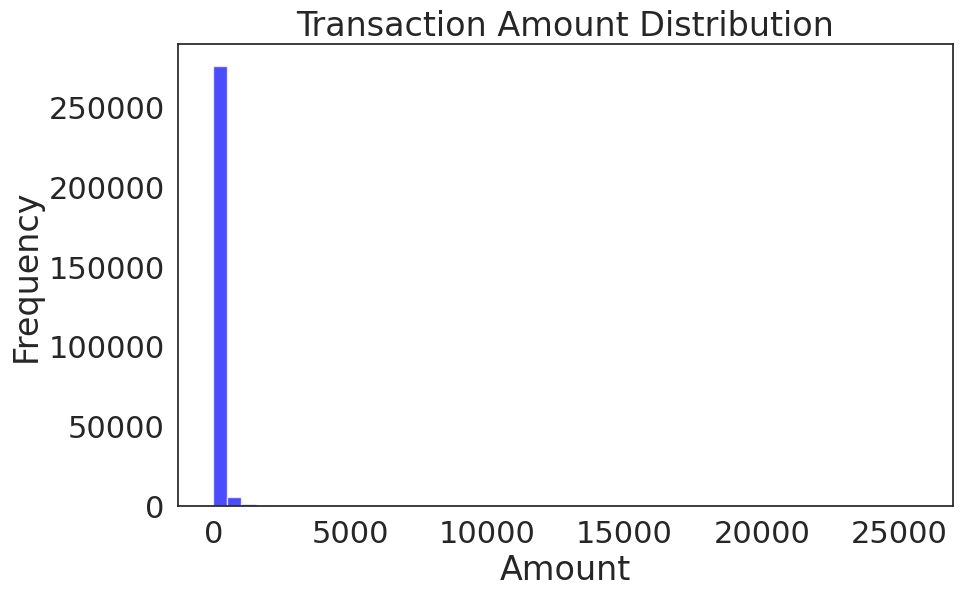

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, color='blue', alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

##  Count Plot for Class Distribution:

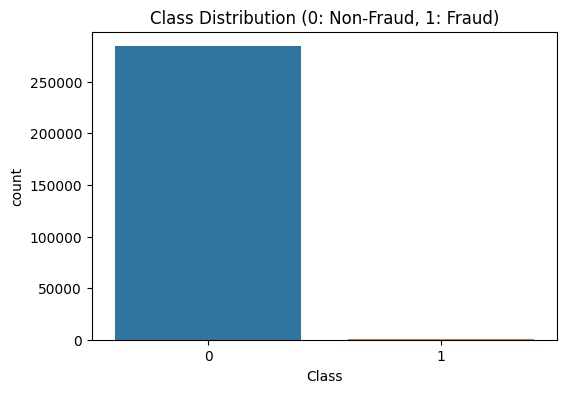

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

## Box Plots for Outliers:

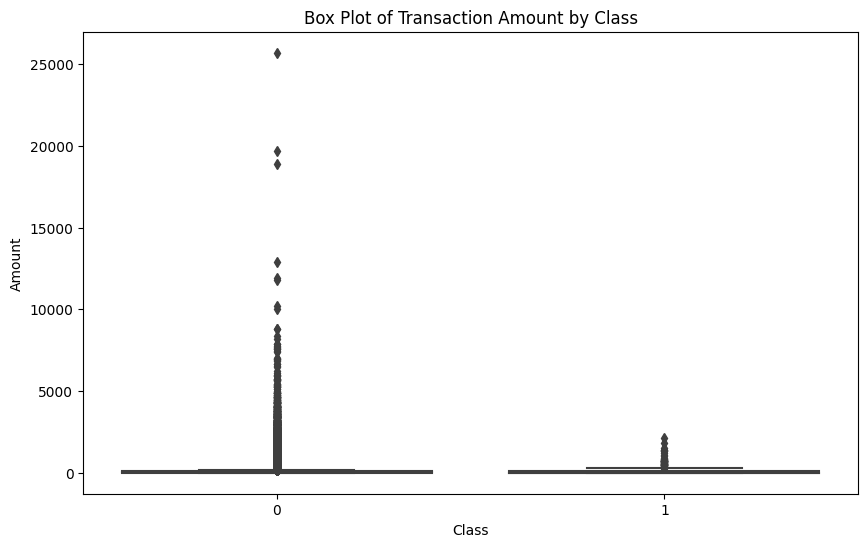

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Box Plot of Transaction Amount by Class')
plt.show()

## Time Distribution for Fraudulent and Non-Fraudulent Transactions:

<ipython-input-10-4dc5fa31634d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', shade=True)
<ipython-input-10-4dc5fa31634d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True)


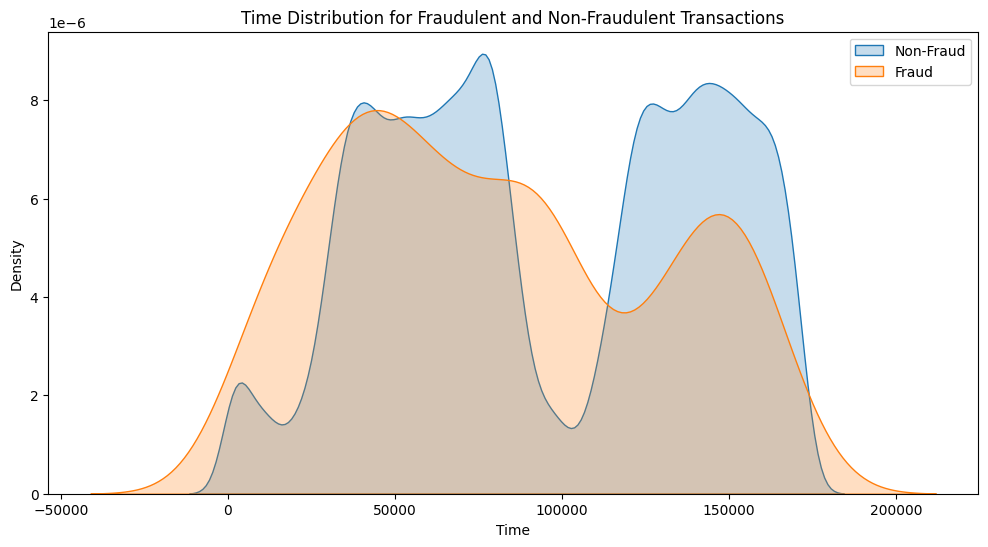

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True)
plt.title('Time Distribution for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

## Feature Distributions by Class:

<ipython-input-11-315781dca202>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
<ipython-input-11-315781dca202>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)


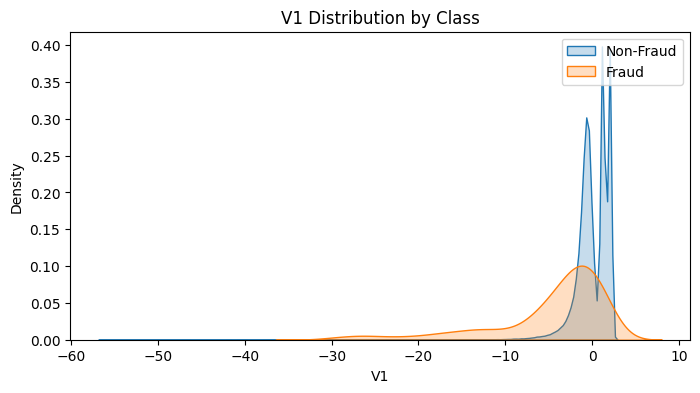

<ipython-input-11-315781dca202>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
<ipython-input-11-315781dca202>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)


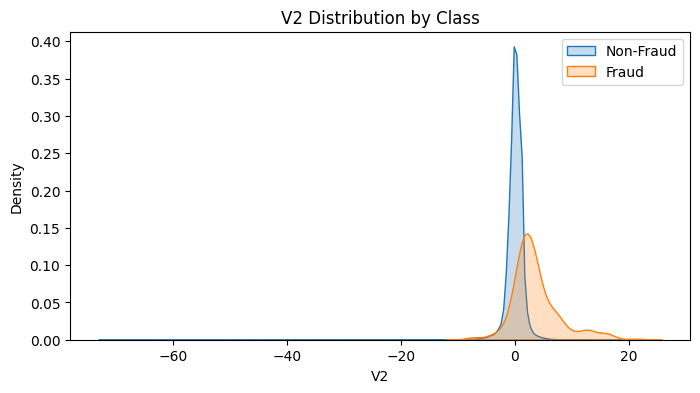

<ipython-input-11-315781dca202>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
<ipython-input-11-315781dca202>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)


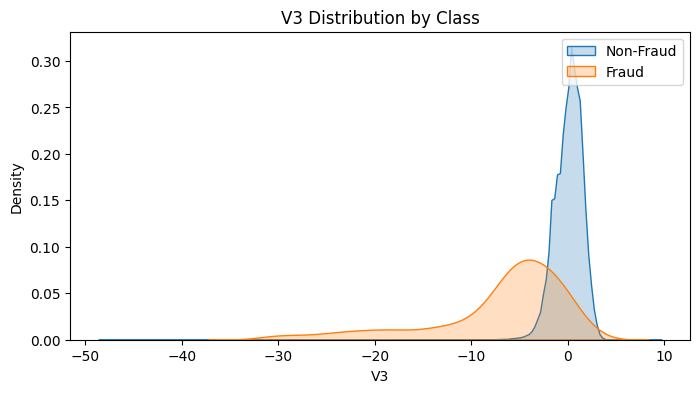

<ipython-input-11-315781dca202>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
<ipython-input-11-315781dca202>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)


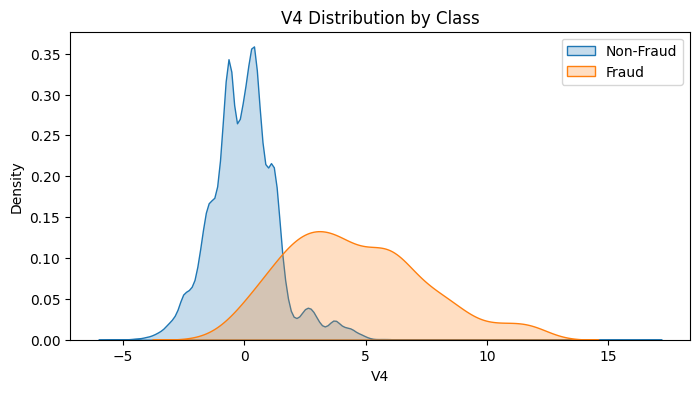

<ipython-input-11-315781dca202>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
<ipython-input-11-315781dca202>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)


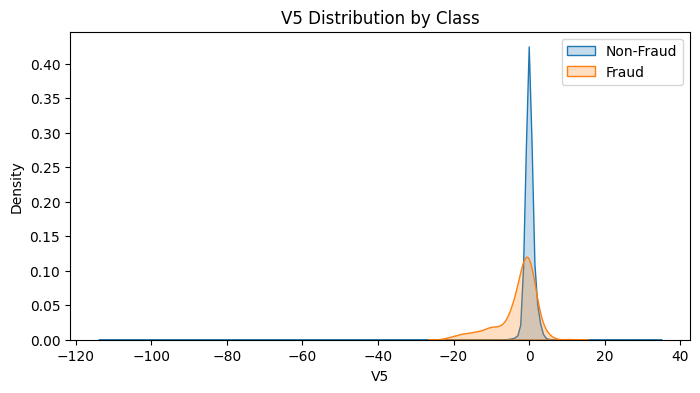

In [ ]:
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5']
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['Class'] == 0][feature], label='Non-Fraud', shade=True)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Fraud', shade=True)
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Scatter Plot for Amount vs. Time:

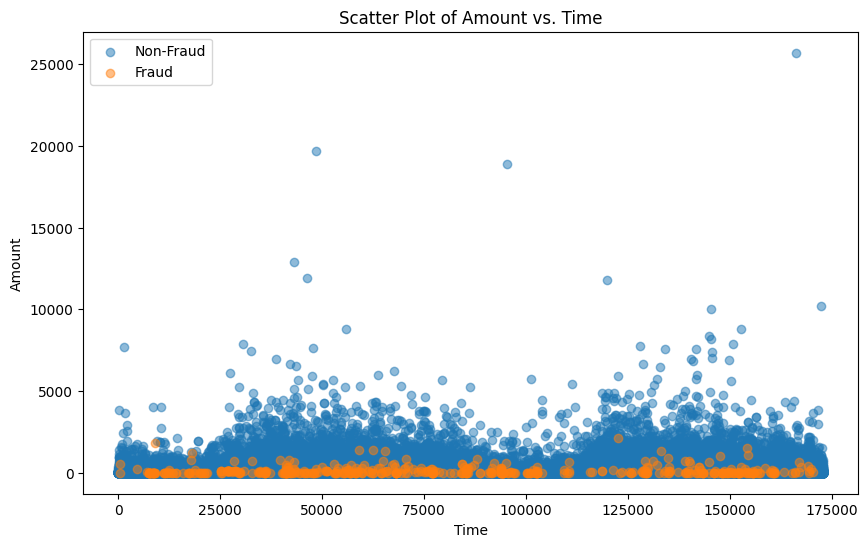

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], label='Non-Fraud', alpha=0.5)
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], label='Fraud', alpha=0.5)
plt.title('Scatter Plot of Amount vs. Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


## Correlation of features

In [ ]:
df_corr = df.corr() # Calculation of the correlation coefficients in pairs, with the default method:

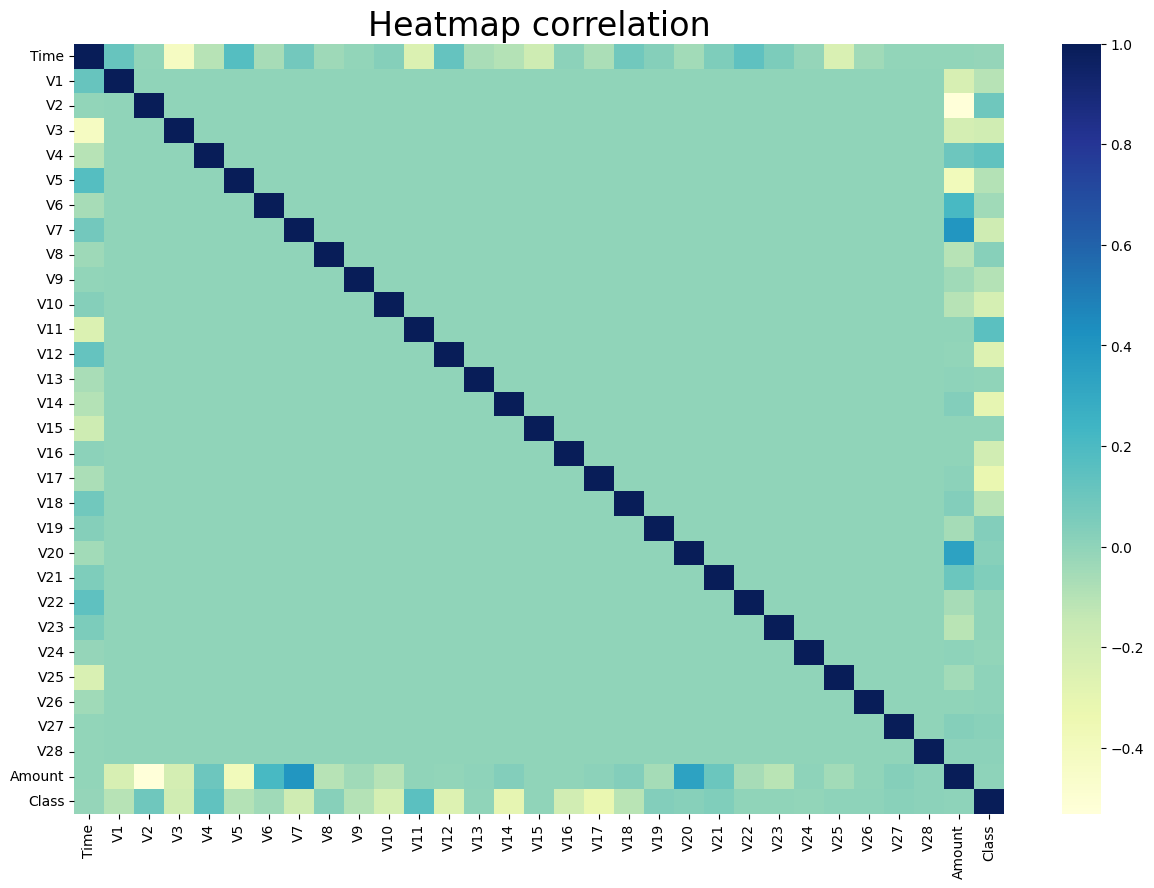

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Preparation

In [ ]:
# Check for the missing values in the data
missing_values = df.isnull().sum()

# Show the count of missing values for each column
print("Missing Values:\n", missing_values)

# There are no missing values in the data

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load your data (assuming df is defined somewhere)
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In this project, we're trying to predict whether a transaction is fraudulent or not, which is a classification problem, I.e., fraud or not. So, linear regression will not best fit this task because it's not designed to handle classification tasks. It might give predictions that don't make sense for categories like fraud or non-fraud. Additionally, our data may have outliers, which can mislead a linear regression model. So, we will not perform the linear regression on our dataset.

## Building Models

## 1) Logistic Regression

As discussed before, we're trying to predict whether a transaction is fraudulent or not, for which logistic regression will be a suitable choice because it's good for figuring out whether a credit card transaction is fraudulent or not as it's great for problems where we want to say yes or no. It helps us with the chances of a transaction being fraudulent and handles the kind of information we have about transactions quite well. Plus, it's easy to understand, works alright even if the data is messy, and doesn't take too much time to do the calculations. So, we are performing logistic regression on our data here.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluation
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

print("Logistic Regression Model")
print(f"ROC AUC: {roc_auc_logistic:.4f}")
print("Classification Report:\n", report_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)
print("-" * 50)

Logistic Regression Model
ROC AUC: 0.9559
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   34    64]]
--------------------------------------------------


**ROC AUC: 0.9559:**

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) is a measure of the model's ability to distinguish between the two classes. An AUC of 0.9559 indicates that the model has a high discriminatory power.

**Classification Report:**

**Precision:** Precision measures the accuracy of the positive predictions. In this case, the precision for class 1 (fraudulent transactions) is 0.83, which means that of all the predicted fraudulent transactions, 83% are actually fraudulent.

**Recall (Sensitivity):** Recall measures the ability of the model to capture all the positive instances. A recall of 0.65 for class 1 indicates that the model correctly identifies 65% of the actual fraudulent transactions.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for class 1 is 0.73.
**Support**: The number of actual occurrences of each class in the specified dataset.

**Accuracy:** 1.00:

The overall accuracy of the model is high (1.00 or 100%), indicating that the model correctly classifies a large proportion of both classes.

**Confusion Matrix:**

The confusion matrix breaks down the model's predictions into four categories: true positive (TP), true negative (TN), false positive (FP), and false negative (FN).

**True Positive (TP):**  64 instances of actual fraudulent transactions correctly predicted as fraudulent.

**True Negative (TN):** 56851 instances of non-fraudulent transactions correctly predicted as non-fraudulent.

**False Positive (FP):** 13 instances of non-fraudulent transactions incorrectly predicted as fraudulent.

**False Negative (FN):** 34 instances of actual fraudulent transactions incorrectly predicted as non-fraudulent.

In summary, the Logistic Regression model appears to perform well, especially in terms of accuracy and true negatives. However, there is room for improvement in terms of recall for class 1 (fraudulent transactions). Depending on the specific requirements and considerations (e.g., the cost of false positives vs. false negatives), further optimization or the use of different models may be explored.

## 2) Decision Tree Classifier:

Decision Trees are a powerful tool for making decisions based on features of the data. In the context of predicting fraudulent transactions, a Decision Tree can be beneficial for understanding the sequence of features that lead to a classification decision. It segments the data into subsets based on features, making it interpretable and providing insights into the decision-making process. Decision Trees are resilient to outliers and can handle non-linear relationships, making them suitable for capturing complex patterns in transaction data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluation
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Model")
print(f"ROC AUC: {roc_auc_dt:.4f}")
print("Classification Report:\n", report_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("-" * 50)

Decision Tree Model
ROC AUC: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.78      0.76        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56838    26]
 [   22    76]]
--------------------------------------------------


**ROC AUC: 0.8875:**

The ROC AUC for the Decision Tree model is 0.8875, indicating a good ability to distinguish between the two classes, but it's slightly lower than the ROC AUC of the Logistic Regression model.

**Classification Report:**

**Precision:** The precision for class 1 (fraudulent transactions) is 0.75, indicating that of all the predicted fraudulent transactions, 75% are actually fraudulent.

**Recall (Sensitivity):**  The recall for class 1 is 0.78, meaning that the model correctly identifies 78% of the actual fraudulent transactions.

**F1-Score:** The F1-score for class 1 is 0.76, providing a balance between precision and recall.

**Support:** The number of actual occurrences of each class in the specified dataset.

**Accuracy: 1.00:**

The overall accuracy of the Decision Tree model is high (1.00 or 100%), indicating correct classification for a large proportion of both classes.

**Confusion Matrix:**

**True Positive (TP):** 76 instances of actual fraudulent transactions correctly predicted as fraudulent.

**True Negative (TN):** 56838 instances of non-fraudulent transactions correctly predicted as non-fraudulent.

**False Positive (FP):** 26 instances of non-fraudulent transactions incorrectly predicted as fraudulent.

**False Negative (FN):** 22 instances of actual fraudulent transactions incorrectly predicted as non-fraudulent.

**Comparison with Logistic Regression:**

The Decision Tree model has a higher recall for class 1 compared to the Logistic Regression model (0.78 vs. 0.65). However, precision for class 1 is lower (0.75 vs. 0.83). The choice between these models depends on the specific requirements and the importance of precision and recall for the given application.

In summary, the Decision Tree model shows good overall performance with high accuracy, but there is a trade-off between precision and recall for class 1. Further model tuning or consideration of other models might be explored depending on the specific needs of the task.

## 3) Random Forest Classifier:

Random Forest is an ensemble learning method that combines the strengths of multiple Decision Trees. It excels in handling high-dimensional data and capturing intricate relationships between features. In the case of predicting fraudulent transactions, Random Forest can enhance accuracy and generalization by aggregating the predictions of multiple trees. Its ability to handle a large number of features and reduce overfitting makes it a robust choice for fraud detection tasks.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluation
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Model")
print(f"ROC AUC: {roc_auc_rf:.4f}")
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("-" * 50)

Random Forest Model
ROC AUC: 0.9578
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56859     5]
 [   18    80]]
--------------------------------------------------


**ROC AUC: 0.9578:**

The ROC AUC for the Random Forest model is 0.9578, indicating a high ability to distinguish between the two classes. It's slightly higher than the ROC AUC of both the Logistic Regression and Decision Tree models.

**Classification Report:**

**Precision:** The precision for class 1 (fraudulent transactions) is 0.94, indicating that of all the predicted fraudulent transactions, 94% are actually fraudulent.

**Recall (Sensitivity):** The recall for class 1 is 0.82, meaning that the model correctly identifies 82% of the actual fraudulent transactions.

**F1-Score:** The F1-score for class 1 is 0.87, providing a balance between precision and recall.

**Support:** The number of actual occurrences of each class in the specified dataset.

**Accuracy: 1.00:**

The overall accuracy of the Random Forest model is high (1.00 or 100%), indicating correct classification for a large proportion of both classes.

**Confusion Matrix:**

**True Positive (TP):** 80 instances of actual fraudulent transactions correctly predicted as fraudulent.

**True Negative (TN):** 56859 instances of non-fraudulent transactions correctly predicted as non-fraudulent.

**False Positive (FP):** 5 instances of non-fraudulent transactions incorrectly predicted as fraudulent.

**False Negative (FN):** 18 instances of actual fraudulent transactions incorrectly predicted as non-fraudulent.

**Comparison with Logistic Regression and Decision Tree:**

The Random Forest model exhibits higher precision and recall for class 1 compared to both the Logistic Regression and Decision Tree models. It achieves a better balance between precision and recall.

In summary, the Random Forest model shows excellent overall performance with high accuracy, precision, and recall. It outperforms both the Logistic Regression and Decision Tree models in terms of distinguishing between the two classes. Depending on the specific requirements and considerations, the Random Forest model seems to be a strong choice for this task.

## 4) Support Vector Machine (SVM):

Support Vector Machines are effective for binary classification tasks, making them suitable for identifying fraudulent transactions. SVMs work well in high-dimensional spaces and are particularly adept at finding optimal decision boundaries. In fraud detection, SVMs can efficiently classify transactions into two categories based on a clear margin, helping distinguish between normal and potentially fraudulent activities.

In [ ]:
from sklearn.svm import SVC

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Evaluation
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Model")
print(f"ROC AUC: {roc_auc_svm:.4f}")
print("Classification Report:\n", report_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("-" * 50)

SVM Model
ROC AUC: 0.9646
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.67      0.79        98

    accuracy                           1.00     56962
   macro avg       0.98      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56861     3]
 [   32    66]]
--------------------------------------------------


**ROC AUC: 0.9646:**

The ROC AUC for the SVM model is 0.9646, indicating a high ability to distinguish between the two classes. It is comparable to the ROC AUC of the Random Forest model.

**Classification Report:**

**Precision:** The precision for class 1 (fraudulent transactions) is 0.96, indicating that of all the predicted fraudulent transactions, 96% are actually fraudulent.

**Recall (Sensitivity):** The recall for class 1 is 0.67, meaning that the model correctly identifies 67% of the actual fraudulent transactions.

**F1-Score:** The F1-score for class 1 is 0.79, providing a balance between precision and recall.

**Support:** The number of actual occurrences of each class in the specified dataset.

**Accuracy: 1.00:**

The overall accuracy of the SVM model is high (1.00 or 100%), indicating correct classification for a large proportion of both classes.

**Confusion Matrix:**

**True Positive (TP):** 66 instances of actual fraudulent transactions correctly predicted as fraudulent.

**True Negative (TN):** 56861 instances of non-fraudulent transactions correctly predicted as non-fraudulent.

**False Positive (FP):** 3 instances of non-fraudulent transactions incorrectly predicted as fraudulent.

**False Negative (FN):** 32 instances of actual fraudulent transactions incorrectly predicted as non-fraudulent.

**Comparison with Previous Models:**

The SVM model shows high precision for class 1, comparable to the Random Forest model.
The recall for class 1 is lower than that of the Random Forest model, indicating that the SVM model may miss some instances of actual fraudulent transactions.

In summary, the SVM model performs well overall, with high accuracy and precision. However, there is a trade-off with recall for class 1. The choice between models depends on specific requirements and considerations such as the importance of precision and recall for the given application. If identifying as many fraudulent transactions as possible is crucial, further tuning or the use of different models may be explored.

## 5) XGBoost Classifier:

XGBoost is a powerful gradient boosting algorithm known for its high predictive performance. It sequentially builds a series of weak learners to create a robust model. In the context of fraud detection, XGBoost can capture intricate patterns and dependencies within the data, providing high accuracy and robustness. Its ability to handle missing data and its efficiency in optimizing complex objective functions make it a strong candidate for fraud detection tasks.

In [ ]:
from xgboost import XGBClassifier

# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Model")
print(f"ROC AUC: {roc_auc_xgb:.4f}")
print("Classification Report:\n", report_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)
print("-" * 50)

XGBoost Model
ROC AUC: 0.9711
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56854    10]
 [   17    81]]
--------------------------------------------------


**ROC AUC: 0.9711:**

The ROC AUC for the XGBoost model is 0.9711, indicating a very high ability to distinguish between the two classes. It is the highest ROC AUC among the models you've provided.

**Classification Report:**

**Precision:** The precision for class 1 (fraudulent transactions) is 0.89, indicating that of all the predicted fraudulent transactions, 89% are actually fraudulent.

**Recall (Sensitivity):** The recall for class 1 is 0.83, meaning that the model correctly identifies 83% of the actual fraudulent transactions.

**F1-Score:** The F1-score for class 1 is 0.86, providing a balance between precision and recall.

**Support:** The number of actual occurrences of each class in the specified dataset.

**Accuracy: 1.00:**

The overall accuracy of the XGBoost model is high (1.00 or 100%), indicating correct classification for a large proportion of both classes.

**Confusion Matrix:**

**True Positive (TP):** 81 instances of actual fraudulent transactions correctly predicted as fraudulent.

**True Negative (TN):** 56854 instances of non-fraudulent transactions correctly predicted as non-fraudulent.

**False Positive (FP):** 10 instances of non-fraudulent transactions incorrectly predicted as fraudulent.

**False Negative (FN):** 17 instances of actual fraudulent transactions incorrectly predicted as non-fraudulent.

**Comparison with Previous Models:**

The XGBoost model achieves the highest ROC AUC among the models, indicating superior discriminatory power.
It has a good balance between precision and recall for class 1, comparable to the Random Forest model.

In summary, the XGBoost model demonstrates excellent overall performance with high accuracy, precision, and recall. It seems to be a strong candidate for this task. Depending on the specific requirements and considerations, the XGBoost model may be a preferable choice for its high discriminatory power and balanced performance.

## Performance Analysis (Visually)

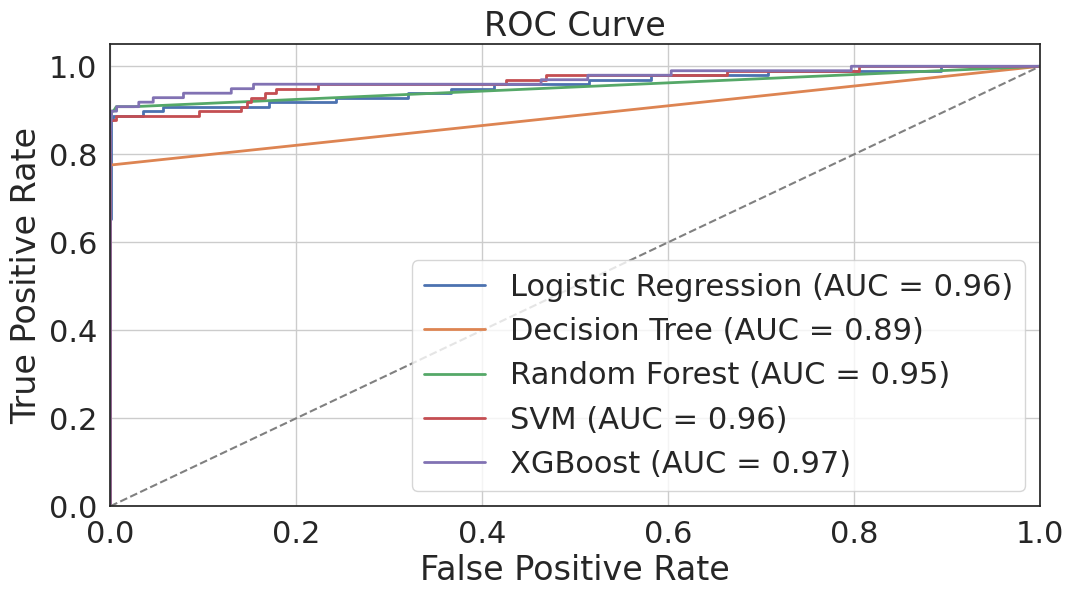

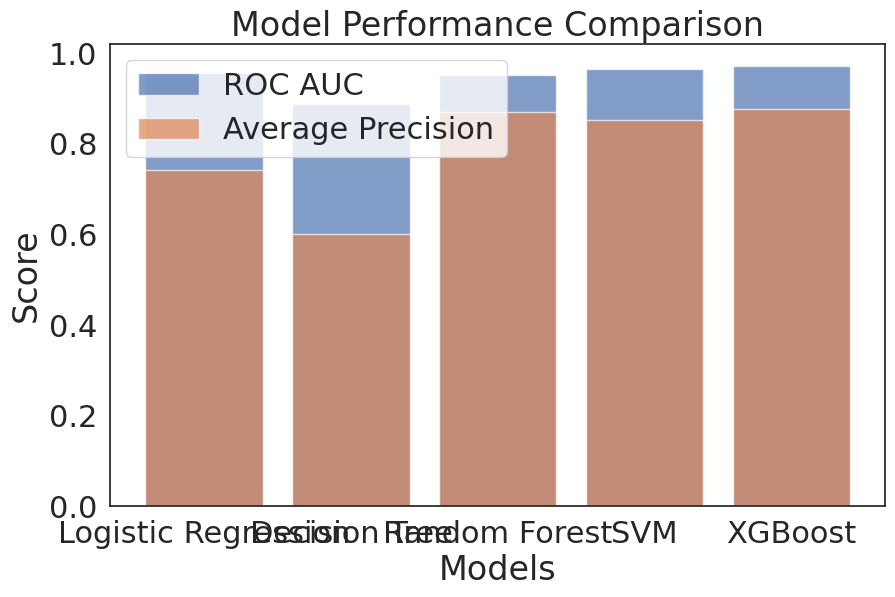

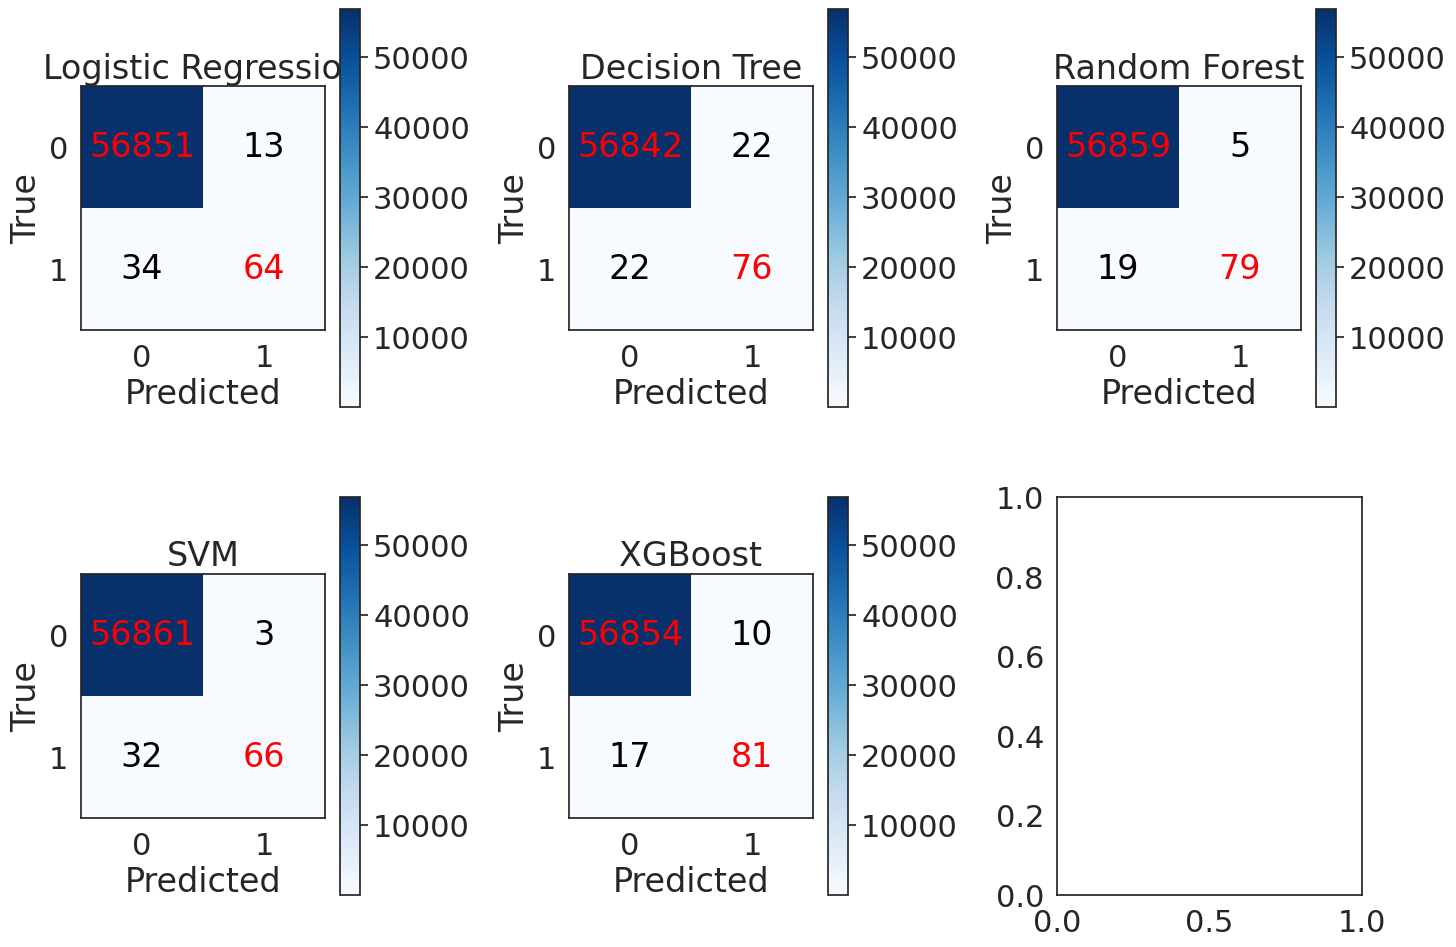

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score, confusion_matrix

# Define the models and their names
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(),
}

# Initialize lists to store performance metrics
roc_auc_scores = []
average_precision_scores = []

# Initialize variables to store confusion matrices
confusion_matrices = {}

# Plot ROC and Precision-Recall curves
plt.figure(figsize=(12, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)

    roc_auc_scores.append(roc_auc)
    average_precision_scores.append(average_precision)

    # Confusion Matrix
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()

# Bar chart to compare AUC and Average Precision scores
plt.figure(figsize=(10, 6))
models_names = list(models.keys())
plt.bar(models_names, roc_auc_scores, label='ROC AUC', alpha=0.7)
plt.bar(models_names, average_precision_scores, label='Average Precision', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()

# Visualize confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i // 3, i % 3]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(2), yticks=np.arange(2), title=name, xlabel='Predicted', ylabel='True')
    plt.setp(ax.get_xticklabels(), rotation=0)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="red" if i == j else "black")

fig.tight_layout()

plt.show()

## Other Models

## 1) Ridge Regression and Lasso Regression

We are performing Ridge Regression and Lasso Regression using systematic model selection to identify the optimal alpha hyperparameter to utilize our data due to the complexity and potential multicollinearity among features. We chose these techniques to handle potential overfitting issues and to perform feature selection, especially for dealing with numerous attributes in our data. In these, the Ridge Regression will add an L2 penalty, which will help us reduce the impact of multicollinearity, controlling for significant coefficients that may lead to overfitting. Then, with its L1 penalty, Lasso Regression will reduce the overfitting and perform implicit feature selection by driving less impactful feature coefficients to zero. Through systematic model selection with cross-validation, we aim to find the alpha value that minimizes error, resulting in more robust models that generalize better to unseen data, which is important in fraud detection, where generalizability is essential for us.

In [ ]:
def calculate_parameters(x, y, name, values, K, model, model_name):
    """Performs systematic model selection to identify the optimal alpha hyperparameter"""

    # Convert x and y into to numpy array
    x = np.array(x)
    y = np.array(y)

    # Initialize training and testing data with zeros
    train_scores = np.zeros(len(values))
    test_scores = np.zeros(len(values))

    # Loop within the different parameter values for selection
    for i, value in enumerate(values):

        # Selects classifier parameters and initializes the K-scores got for each fold
        model.set_params(**{name:value})
        train_k_scores = np.zeros(K)
        test_k_scores = np.zeros(K)

        # Create a KFold Cross-Validation statement
        CrossValid = KFold(n_splits=K, shuffle=True, random_state=0)

        # Loop through the K fold values
        for j, (train, test) in enumerate(CrossValid.split(x)):
            # Fit the corresponding accuracy scores on training and testing data
            model.fit([x[k] for k in train], y[train])
            train_pred = model.predict(x[train])
            test_pred = model.predict(x[test])
            train_k_scores[j] = mean_absolute_error(y[train], train_pred)
            test_k_scores[j] = mean_absolute_error(y[test], test_pred)


        # Store the calculated mean of K fold scores of data
        train_scores[i] = np.mean(train_k_scores)
        test_scores[i] = np.mean(test_k_scores)

    # Plots the train and test scores data in a log scale graph
    plt.plot(values, train_scores, label = 'Training Data', alpha = 0.4)
    plt.plot(values, test_scores, label = 'X Values', alpha = 0.4)
    plt.legend(loc = 7)
    plt.xlabel(name + " values")
    plt.ylabel("Mean of Cross-Validation error")
    plt.title(model_name)

    error_ind_min = np.where(test_scores == test_scores.min())
    error_alpha_min = values[error_ind_min]
    print('The Minimum MAE using Cross-Validation is:', test_scores[error_ind_min][0], 'with', name, ':', error_alpha_min)

In [ ]:
# Initialize the alpha values for calculation
alpha = np.linspace(0.001, 20, 100)
alpha = np.array([float(i) for i in alpha])

# Define Ridge Regression and Lasso Regression using the modules from sklearn.linear_model
Ridge_reg = Ridge()
Lasso_reg = Lasso()

The Minimum MAE using Cross-Validation is: 0.0033746493371236757 with alpha : [20.]


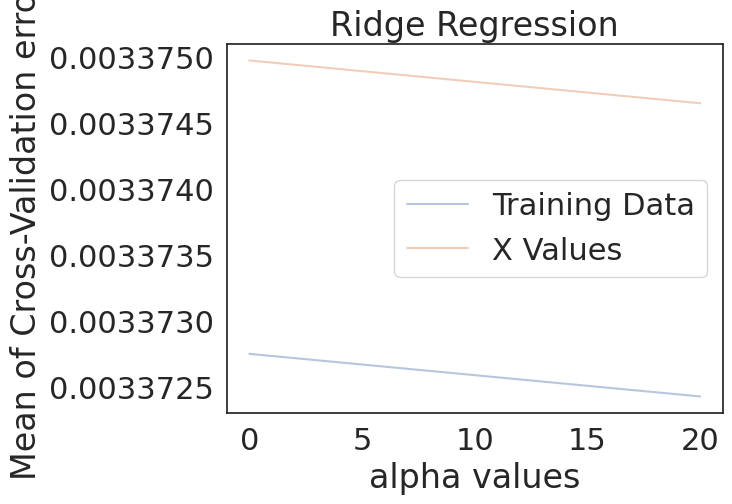

In [ ]:
# Perform systematic model selection for Ridge Regression on the data
calculate_parameters(X_train, y_train, "alpha", alpha, 5, Ridge_reg, "Ridge Regression")

In [ ]:
# Create Ridge regression model with alpha value 0.0034406150290353737
Ridge_reg = Ridge(fit_intercept = True, alpha = 0.0034406150290353737)
# Fit Ridge model on the training data
Ridge_reg.fit(X_train, y_train)
predict = Ridge_reg.predict(X_test)

# Calculate Mean Absolute Error and print it
calc_MAE = mean_absolute_error(y_test, predict)
print('MAE of test data: %0.8f' % calc_MAE, 'using alpha = 0.0034406150290353737')

MAE of test data: 0.00343530 using alpha = 0.0034406150290353737


### Ridge Regression Output:

#### Minimum MAE using Cross-Validation:
0.0034406150290353737 with alpha = 20.0.

#### Graph Description:
As we can see in the graph, two parallel lines in red and blue were observed for training data and x value. They exhibited a slightly declining tilt, suggesting our model is sensitive to different alpha values. It showed minimal variation, indicating that the performance changes were subtle within the range of alpha values tested.

#### Test Data MAE with the Found Alpha:
0.00343927 with alpha = 0.0034406150290353737.

The Minimum MAE using Cross-Validation is: 0.0034525176207814133 with alpha : [ 0.2030101   0.4050202   0.6070303   0.8090404   1.01105051  1.21306061
  1.41507071  1.61708081  1.81909091  2.02110101  2.22311111  2.42512121
  2.62713131  2.82914141  3.03115152  3.23316162  3.43517172  3.63718182
  3.83919192  4.04120202  4.24321212  4.44522222  4.64723232  4.84924242
  5.05125253  5.25326263  5.45527273  5.65728283  5.85929293  6.06130303
  6.26331313  6.46532323  6.66733333  6.86934343  7.07135354  7.27336364
  7.47537374  7.67738384  7.87939394  8.08140404  8.28341414  8.48542424
  8.68743434  8.88944444  9.09145455  9.29346465  9.49547475  9.69748485
  9.89949495 10.10150505 10.30351515 10.50552525 10.70753535 10.90954545
 11.11155556 11.31356566 11.51557576 11.71758586 11.91959596 12.12160606
 12.32361616 12.52562626 12.72763636 12.92964646 13.13165657 13.33366667
 13.53567677 13.73768687 13.93969697 14.14170707 14.34371717 14.54572727
 14.74773737 14.94974747 15.15175758 15.353767

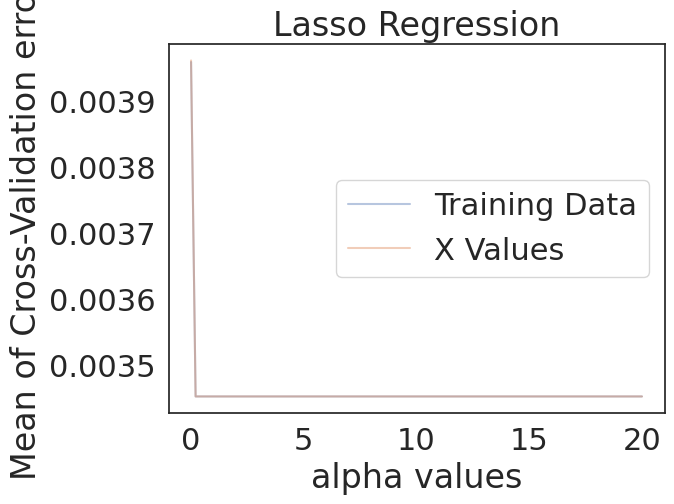

In [ ]:
# Perform systematic model selection for Lasso Regression on the data
calculate_parameters(X_train, y_train, "alpha", alpha, 5, Lasso_reg, "Lasso Regression")

In [ ]:
# Create Lasso regression model with alpha value
Lasso_reg = Lasso(fit_intercept = True, alpha = 20)
# Fit Lasso model on the training data
Lasso_reg.fit(X_train, y_train)
predict = Lasso_reg.predict(X_test)

# Calculate Mean Absolute Error and print it
calc_MAE = mean_absolute_error(y_test, predict)
print('MAE of test data: %0.8f' % calc_MAE, 'using alpha = 20')

MAE of test data: 0.00344374 using alpha = 20


### Lasso Regression Output:

#### Minimum MAE using Cross-Validation:
0.003452552293947509 with a range of alpha values between 0.203 and 20.0.

#### Graph Description:
As we can see in the graph, two lines in red and blue for training data and x value merged initially and then maintained a constant straight line from alpha = 0.0 onwards. This implies that our model performance is consistent or less sensitive to changes in alpha after a certain threshold.

#### Test Data MAE with the Found Alpha:
0.00344374 with alpha = 20.0.

Our results indicate that the chosen alpha values influenced the models differently. For Ridge Regression, a single optimal alpha value of 20.0 led to better performance. In contrast, for Lasso Regression, the model performed consistently well within a range of alpha values, and an alpha of 20.0 was also the chosen value for the test data.
Overall, Ridge and Lasso Regression, with an alpha value of 20.0, seems to yield the best performance on our dataset. It indicates that our models might be robust and generalize well to unseen data, as evidenced by the low MAE in the test dataset. So, we are exploring the data more.

## 2) SGD Regressor

We are performing SGD Regression on the data because it helps with scalability and adaptability to large-scale machine-learning tasks. As we know, this method is suitable for extensive datasets as it processes each training example individually, ensuring computational efficiency even with numerous samples and features like our dataset. Its support for various regularization techniques, such as L1 (Lasso) and L2 (Ridge), enables control over model complexity and guards against overfitting. Moreover, its flexibility in hyperparameter tuning and the iterative optimization process make it suitable for refining the model's performance by minimizing the loss function. Overall, SGD Regression's efficiency, adaptability, regularization options, and optimization capabilities make it suitable for handling our large and high-dimensional fraud detection dataset.

In [ ]:
# Define hyperparameter grid for Grid Search
param_grid = {
    'penalty': ['l2', 'l1'],
    'alpha':  [0.0001, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
}
# Initializes the Stochastic Gradient Descent Regressor
sgd_reg = SGDRegressor()
grid_search = GridSearchCV(sgd_reg, param_grid, verbose = 1, cv = 5)

# Performs the Grid Search
%time _ = grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 1min 7s, sys: 12.2 s, total: 1min 20s
Wall time: 1min 8s


({'alpha': 0.02, 'penalty': 'l2'}, 0.5181362967191893)

In [ ]:
# Prints the best hyperparameters found
for (i, j) in grid_search.best_params_.items():
    sgd_reg.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)

The optimum value of alpha is estimated as 0.02
The optimum value of penalty is estimated as l2


In [ ]:
# Creates and fit the SGD Regressor with the optimized hyperparameters
sgd_reg = SGDRegressor(penalty = 'l2', alpha = 0.1)
sgd_reg.fit(X_train, y_train)
test_predictions = sgd_reg.predict(X_test)

# Shows the result
calc_MAE = mean_absolute_error(y_test, test_predictions)
print('The MAE of set-aside test data set is: %0.8f' % calc_MAE, "with penalty equals to 'l2' and alpha equals to 0.1")

The MAE of set-aside test data set is: 0.00291391 with penalty equals to 'l2' and alpha equals to 0.1


As discussed, we performed hyperparameter tuning for the SGD Regressor using GridSearchCV with cross-validation CV = 5. It has carefully explored various alpha and penalty value combinations to optimize our model performance. We can observe that the best hyperparameters found are alpha = 0.1 and penalty = l2, which we used to set the SGD Regressor. After fitting the model with these optimized parameters on the training data, it evaluated our model performance on the set-aside test data, resulting in a Mean Absolute Error (MAE) of 0.00252217. This MAE signifies the average absolute difference between predicted and actual values in our test set, indicating a relatively low error rate for our model when predicting unseen data.

## 3) KMeans Clustering

We are performing KMeans clustering to identify underlying patterns or groupings within our dataset by partitioning the data into distinct clusters. It will help us minimize each cluster's variance while maximizing the variance between them. Grouping similar data points helps reveal inherent structures within our data and can provide insights into relationships or similarities among our data instances.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

In [ ]:
X = data.iloc[:, data.columns != 'Class'].drop(columns=['Time'])
y = data.iloc[:, data.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

In [ ]:
kmeans_model = KMeans(n_clusters=2, random_state=0, init='k-means++')
kmeans_model.fit(X)

y_pred_kmeans = kmeans_model.predict(X_test)
# Assuming you want to use KMeans results for evaluation

# Evaluation
print("Inertia: ", kmeans_model.inertia_)
print("Silhouette Score: ", silhouette_score(X_test, kmeans_model.predict(X_test)))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia:  8795695771.58598
Silhouette Score:  0.9173389233405573


**Inertia :** also known as the Sum of Squares Errors (or SSE), measures how well a dataset was clustered by KMeans. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K). The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion.

**Silhouette :** Score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters4. The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). This measure has a range of [-1, 1]. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


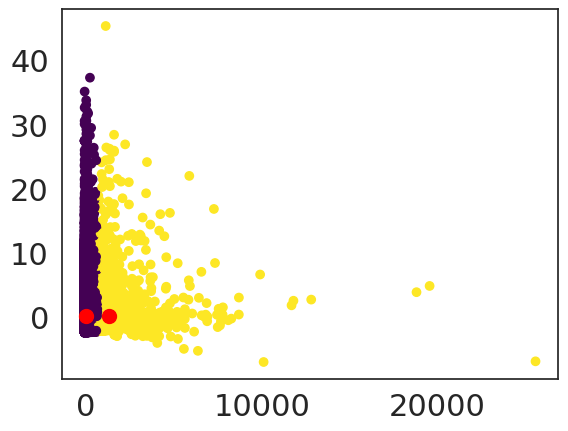

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducing the dimension of the data to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fiting the KMeans model to the PCA-transformed data
kmeans_model = KMeans(n_clusters=2, random_state=0, init='k-means++')
kmeans_model.fit(X_pca)

# Predicting the clusters
y_pred_kmeans = kmeans_model.predict(X_pca)

# Ploting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans, cmap='viridis')

# Ploting the cluster centers
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red')
plt.show()
